# Testing code

Capturing data for 60 seconds...
Data saved to C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v4\\t1.csv


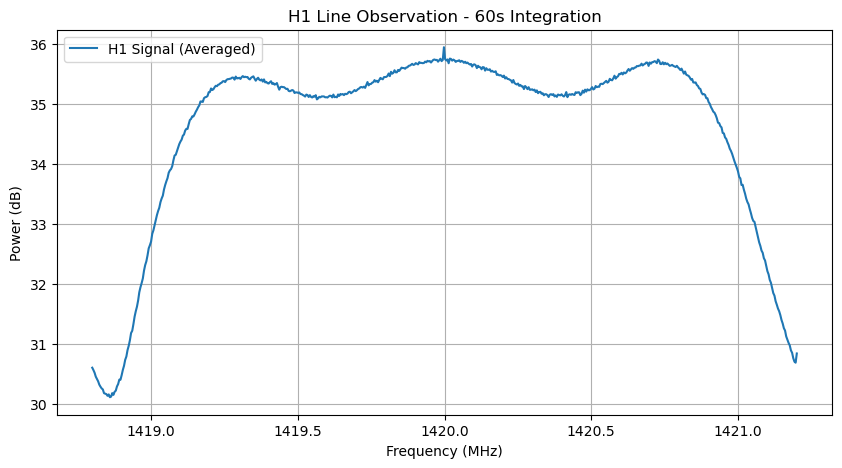

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from rtlsdr import RtlSdr
import time

# ---- SETTINGS ----
SAVE_FOLDER = r"C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v4\\"  # Ensure correct path
INTEGRATION_TIME = 60  # Seconds to integrate
BIN_SIZE = 4e3  # Bin size in Hz (adjust for frequency resolution)

# Generate a unique filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"t1.csv"
save_path = os.path.join(SAVE_FOLDER, filename)

# Ensure folder exists
os.makedirs(SAVE_FOLDER, exist_ok=True)

# ---- RTL-SDR SETUP ----
sdr = RtlSdr()
sdr.sample_rate = 2.4e6  # 2.4 MHz sampling rate
sdr.center_freq = 1420e6  # Center at 1420 MHz (H1 line)
sdr.gain = 49.6  # Max gain

# ---- DATA COLLECTION ----
print(f"Capturing data for {INTEGRATION_TIME} seconds...")
start_time = time.time()

# Initialize power spectrum accumulation
n_samples = 256 * 1024  # 256K samples per read
num_bins = int(sdr.sample_rate / BIN_SIZE)
avg_spectrum = np.zeros(num_bins)

count = 0
while time.time() - start_time < INTEGRATION_TIME:
    samples = sdr.read_samples(n_samples)
    
    # Compute FFT
    spectrum = np.abs(np.fft.fftshift(np.fft.fft(samples)))**2
    
    # Re-bin data
    freqs = np.fft.fftshift(np.fft.fftfreq(len(samples), d=1/sdr.sample_rate)) + 1420e6
    bin_indices = np.digitize(freqs, np.linspace(freqs.min(), freqs.max(), num_bins)) - 1
    binned_spectrum = np.zeros(num_bins)
    
    for i in range(num_bins):
        binned_spectrum[i] = np.mean(spectrum[bin_indices == i]) if np.any(bin_indices == i) else 0
    
    # Accumulate
    avg_spectrum += binned_spectrum
    count += 1

# Compute final average
avg_spectrum /= count
sdr.close()

# Convert to dB
power_db = 10 * np.log10(avg_spectrum)

# Save data to CSV
df = pd.DataFrame({"Frequency (Hz)": np.linspace(freqs.min(), freqs.max(), num_bins), "Power (dB)": power_db})
df.to_csv(save_path, index=False)

print(f"Data saved to {save_path}")

# ---- PLOT SPECTRUM ----
plt.figure(figsize=(10, 5))
plt.plot(df["Frequency (Hz)"] / 1e6, df["Power (dB)"], label="H1 Signal (Averaged)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB)")
plt.title(f"H1 Line Observation - {INTEGRATION_TIME}s Integration")
plt.legend()
plt.grid()
plt.show()


Capturing data for 60 seconds...
Data saved to C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v4\\t2.csv


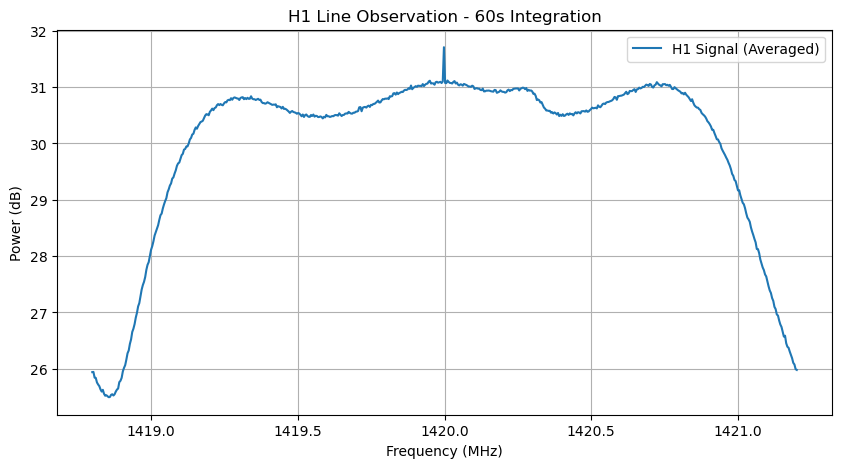

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from rtlsdr import RtlSdr
import time

# ---- SETTINGS ----
SAVE_FOLDER = r"C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v4\\"  # Ensure correct path
INTEGRATION_TIME = 60  # Seconds to integrate
BIN_SIZE = 4e3  # Bin size in Hz (adjust for frequency resolution)

# Generate a unique filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"t2.csv"
save_path = os.path.join(SAVE_FOLDER, filename)

# Ensure folder exists
os.makedirs(SAVE_FOLDER, exist_ok=True)

# ---- RTL-SDR SETUP ----
sdr = RtlSdr()
sdr.sample_rate = 2.4e6  # 2.4 MHz sampling rate
sdr.center_freq = 1420e6  # Center at 1420 MHz (H1 line)
sdr.gain = 49.6  # Max gain

# ---- DATA COLLECTION ----
print(f"Capturing data for {INTEGRATION_TIME} seconds...")
start_time = time.time()

# Initialize power spectrum accumulation
n_samples = 256 * 1024  # 256K samples per read
num_bins = int(sdr.sample_rate / BIN_SIZE)
avg_spectrum = np.zeros(num_bins)

count = 0
while time.time() - start_time < INTEGRATION_TIME:
    samples = sdr.read_samples(n_samples)
    
    # Compute FFT
    spectrum = np.abs(np.fft.fftshift(np.fft.fft(samples)))**2
    
    # Re-bin data
    freqs = np.fft.fftshift(np.fft.fftfreq(len(samples), d=1/sdr.sample_rate)) + 1420e6
    bin_indices = np.digitize(freqs, np.linspace(freqs.min(), freqs.max(), num_bins)) - 1
    binned_spectrum = np.zeros(num_bins)
    
    for i in range(num_bins):
        binned_spectrum[i] = np.mean(spectrum[bin_indices == i]) if np.any(bin_indices == i) else 0
    
    # Accumulate
    avg_spectrum += binned_spectrum
    count += 1

# Compute final average
avg_spectrum /= count
sdr.close()

# Convert to dB
power_db = 10 * np.log10(avg_spectrum)

# Save data to CSV
df = pd.DataFrame({"Frequency (Hz)": np.linspace(freqs.min(), freqs.max(), num_bins), "Power (dB)": power_db})
df.to_csv(save_path, index=False)

print(f"Data saved to {save_path}")

# ---- PLOT SPECTRUM ----
plt.figure(figsize=(10, 5))
plt.plot(df["Frequency (Hz)"] / 1e6, df["Power (dB)"], label="H1 Signal (Averaged)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB)")
plt.title(f"H1 Line Observation - {INTEGRATION_TIME}s Integration")
plt.legend()
plt.grid()
plt.show()


Capturing data for 60 seconds...
Data saved to C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v4\\t3.csv


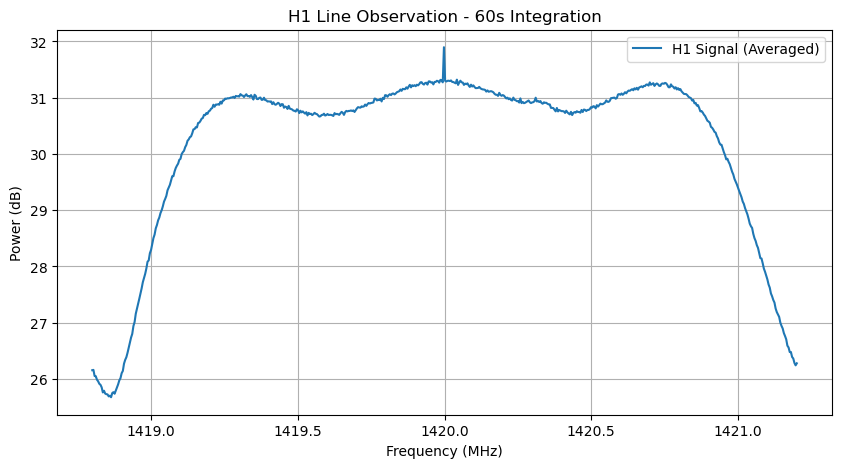

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from rtlsdr import RtlSdr
import time

# ---- SETTINGS ----
SAVE_FOLDER = r"C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v4\\"  # Ensure correct path
INTEGRATION_TIME = 60  # Seconds to integrate
BIN_SIZE = 4e3  # Bin size in Hz (adjust for frequency resolution)

# Generate a unique filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"t3.csv"   #different location in sky
save_path = os.path.join(SAVE_FOLDER, filename)

# Ensure folder exists
os.makedirs(SAVE_FOLDER, exist_ok=True)

# ---- RTL-SDR SETUP ----
sdr = RtlSdr()
sdr.sample_rate = 2.4e6  # 2.4 MHz sampling rate
sdr.center_freq = 1420e6  # Center at 1420 MHz (H1 line)
sdr.gain = 49.6  # Max gain

# ---- DATA COLLECTION ----
print(f"Capturing data for {INTEGRATION_TIME} seconds...")
start_time = time.time()

# Initialize power spectrum accumulation
n_samples = 256 * 1024  # 256K samples per read
num_bins = int(sdr.sample_rate / BIN_SIZE)
avg_spectrum = np.zeros(num_bins)

count = 0
while time.time() - start_time < INTEGRATION_TIME:
    samples = sdr.read_samples(n_samples)
    
    # Compute FFT
    spectrum = np.abs(np.fft.fftshift(np.fft.fft(samples)))**2
    
    # Re-bin data
    freqs = np.fft.fftshift(np.fft.fftfreq(len(samples), d=1/sdr.sample_rate)) + 1420e6
    bin_indices = np.digitize(freqs, np.linspace(freqs.min(), freqs.max(), num_bins)) - 1
    binned_spectrum = np.zeros(num_bins)
    
    for i in range(num_bins):
        binned_spectrum[i] = np.mean(spectrum[bin_indices == i]) if np.any(bin_indices == i) else 0
    
    # Accumulate
    avg_spectrum += binned_spectrum
    count += 1

# Compute final average
avg_spectrum /= count
sdr.close()

# Convert to dB
power_db = 10 * np.log10(avg_spectrum)

# Save data to CSV
df = pd.DataFrame({"Frequency (Hz)": np.linspace(freqs.min(), freqs.max(), num_bins), "Power (dB)": power_db})
df.to_csv(save_path, index=False)

print(f"Data saved to {save_path}")

# ---- PLOT SPECTRUM ----
plt.figure(figsize=(10, 5))
plt.plot(df["Frequency (Hz)"] / 1e6, df["Power (dB)"], label="H1 Signal (Averaged)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB)")
plt.title(f"H1 Line Observation - {INTEGRATION_TIME}s Integration")
plt.legend()
plt.grid()
plt.show()


Capturing data for 60 seconds...
Data saved to C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v4\\t4.csv


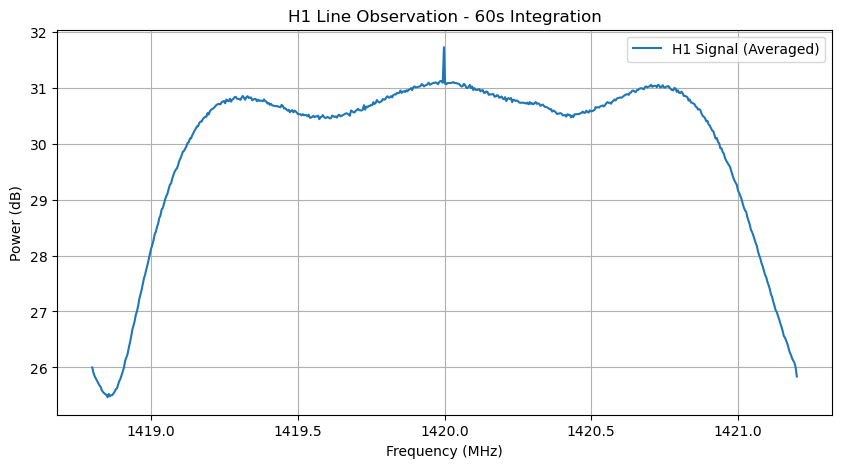

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from rtlsdr import RtlSdr
import time

# ---- SETTINGS ----
SAVE_FOLDER = r"C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v4\\"  # Ensure correct path
INTEGRATION_TIME = 60  # Seconds to integrate
BIN_SIZE = 4e3  # Bin size in Hz (adjust for frequency resolution)

# Generate a unique filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"t4.csv"   #different location in sky
save_path = os.path.join(SAVE_FOLDER, filename)

# Ensure folder exists
os.makedirs(SAVE_FOLDER, exist_ok=True)

# ---- RTL-SDR SETUP ----
sdr = RtlSdr()
sdr.sample_rate = 2.4e6  # 2.4 MHz sampling rate
sdr.center_freq = 1420e6  # Center at 1420 MHz (H1 line)
sdr.gain = 49.6  # Max gain

# ---- DATA COLLECTION ----
print(f"Capturing data for {INTEGRATION_TIME} seconds...")
start_time = time.time()

# Initialize power spectrum accumulation
n_samples = 256 * 1024  # 256K samples per read
num_bins = int(sdr.sample_rate / BIN_SIZE)
avg_spectrum = np.zeros(num_bins)

count = 0
while time.time() - start_time < INTEGRATION_TIME:
    samples = sdr.read_samples(n_samples)
    
    # Compute FFT
    spectrum = np.abs(np.fft.fftshift(np.fft.fft(samples)))**2
    
    # Re-bin data
    freqs = np.fft.fftshift(np.fft.fftfreq(len(samples), d=1/sdr.sample_rate)) + 1420e6
    bin_indices = np.digitize(freqs, np.linspace(freqs.min(), freqs.max(), num_bins)) - 1
    binned_spectrum = np.zeros(num_bins)
    
    for i in range(num_bins):
        binned_spectrum[i] = np.mean(spectrum[bin_indices == i]) if np.any(bin_indices == i) else 0
    
    # Accumulate
    avg_spectrum += binned_spectrum
    count += 1

# Compute final average
avg_spectrum /= count
sdr.close()

# Convert to dB
power_db = 10 * np.log10(avg_spectrum)

# Save data to CSV
df = pd.DataFrame({"Frequency (Hz)": np.linspace(freqs.min(), freqs.max(), num_bins), "Power (dB)": power_db})
df.to_csv(save_path, index=False)

print(f"Data saved to {save_path}")

# ---- PLOT SPECTRUM ----
plt.figure(figsize=(10, 5))
plt.plot(df["Frequency (Hz)"] / 1e6, df["Power (dB)"], label="H1 Signal (Averaged)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB)")
plt.title(f"H1 Line Observation - {INTEGRATION_TIME}s Integration")
plt.legend()
plt.grid()
plt.show()


Capturing data for 120 seconds...


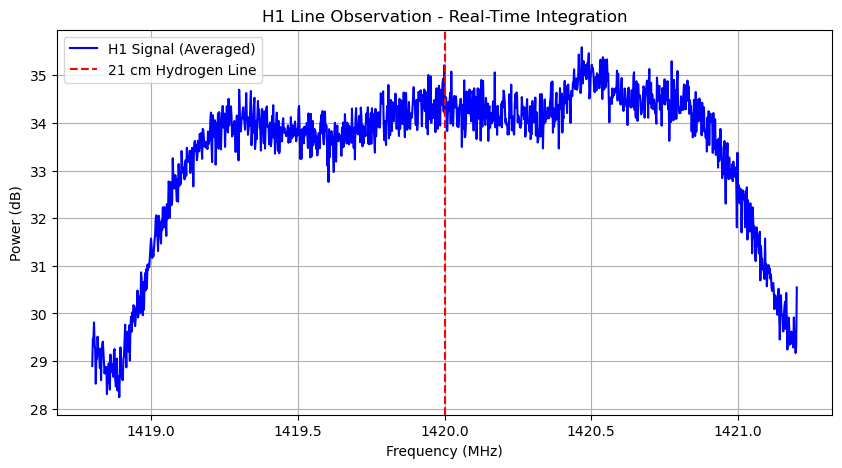

✅ Data saved to: C:\Users\sksam\OneDrive\Desktop\ProjH1\rtlpower test data\v3\h1.csv


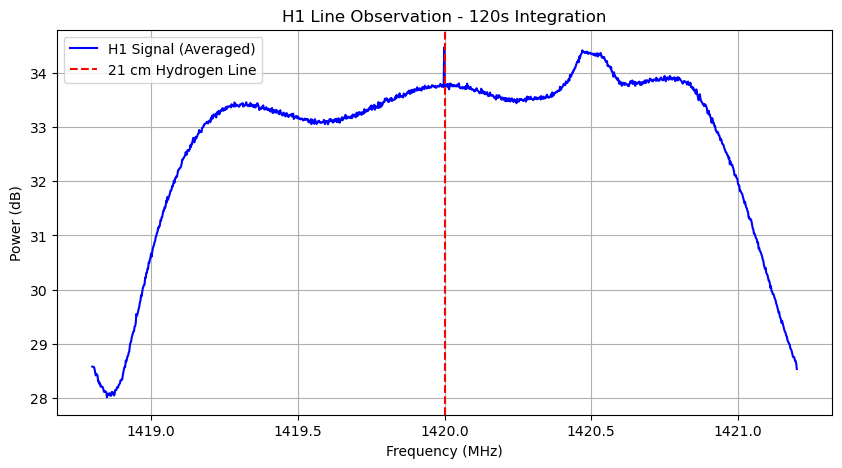

In [13]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from rtlsdr import RtlSdr

# ---- SETTINGS ----
SAVE_FOLDER = r"C:\Users\sksam\OneDrive\Desktop\ProjH1\rtlpower test data\v3"  # Ensure correct path
INTEGRATION_TIME = 120  # Integration time in seconds
BIN_SIZE = 2e3  # Bin size in Hz

# Generate a unique filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"h1.csv"
save_path = os.path.join(SAVE_FOLDER, filename)

# Ensure folder exists
os.makedirs(SAVE_FOLDER, exist_ok=True)

# ---- RTL-SDR SETUP ----
sdr = RtlSdr()
sdr.sample_rate = 2.4e6  # Increased sample rate for better resolution
sdr.center_freq = 1420e6  # Center at 1420 MHz (H1 line)
sdr.gain = 49.6  # Maximum gain for better sensitivity

# ---- DATA COLLECTION ----
print(f"Capturing data for {INTEGRATION_TIME} seconds...")
start_time = time.time()

n_samples = 256 * 1024  # 256K samples per read
num_bins = int(sdr.sample_rate / BIN_SIZE)
avg_spectrum = np.zeros(num_bins)

count = 0
plt.ion()  # Enable interactive mode for real-time plotting
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], label="H1 Signal (Averaged)", color="blue")
ax.axvline(1420, color='r', linestyle='dashed', label="21 cm Hydrogen Line")
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Power (dB)")
ax.set_title("H1 Line Observation - Real-Time Integration")
ax.legend()
ax.grid()

while time.time() - start_time < INTEGRATION_TIME:
    samples = sdr.read_samples(n_samples)
    
    # Compute FFT and shift it
    spectrum = np.abs(np.fft.fftshift(np.fft.fft(samples)))**2
    
    # Re-bin data
    freqs = np.fft.fftshift(np.fft.fftfreq(len(samples), d=1/sdr.sample_rate)) + 1420e6
    bin_indices = np.digitize(freqs, np.linspace(freqs.min(), freqs.max(), num_bins)) - 1
    binned_spectrum = np.zeros(num_bins)
    
    for i in range(num_bins):
        binned_spectrum[i] = np.mean(spectrum[bin_indices == i]) if np.any(bin_indices == i) else 0
    
    # Accumulate power spectrum
    avg_spectrum += binned_spectrum
    count += 1
    
    # Compute average power and convert to dB
    power_db = 10 * np.log10(avg_spectrum / count + 1e-10)
    
    # Update real-time plot
    line.set_xdata(np.linspace(freqs.min(), freqs.max(), num_bins) / 1e6)
    line.set_ydata(power_db)
    ax.relim()
    ax.autoscale_view()
    plt.pause(0.1)

# Compute final average
avg_spectrum /= count
sdr.close()

# Convert power to dB
power_db = 10 * np.log10(avg_spectrum + 1e-10)  # Avoid log(0)

# Get Date and Time for logging
current_date = datetime.datetime.now().strftime("%Y-%m-%d")
current_time = datetime.datetime.now().strftime("%H:%M:%S")

# Save data to CSV
with open(save_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Date", "Time", "Frequency (Hz)", "Power (dB)", "Bin Size (Hz)"])
    for freq, power in zip(np.linspace(freqs.min(), freqs.max(), num_bins), power_db):
        writer.writerow([current_date, current_time, freq, power, BIN_SIZE])

print(f"✅ Data saved to: {save_path}")

# ---- FINAL PLOT ----
plt.ioff()  # Disable interactive mode
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(freqs.min(), freqs.max(), num_bins) / 1e6, power_db, label="H1 Signal (Averaged)", color="blue")
plt.axvline(1420, color='r', linestyle='dashed', label="21 cm Hydrogen Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB)")
plt.title(f"H1 Line Observation - {INTEGRATION_TIME}s Integration")
plt.legend()
plt.grid()
plt.show()


# Data Collector

Capturing data for 60 seconds...
Data saved to C:\Users\DELL\OneDrive\Desktop\ProjH1\python rtlsdr data\v7\105.csv


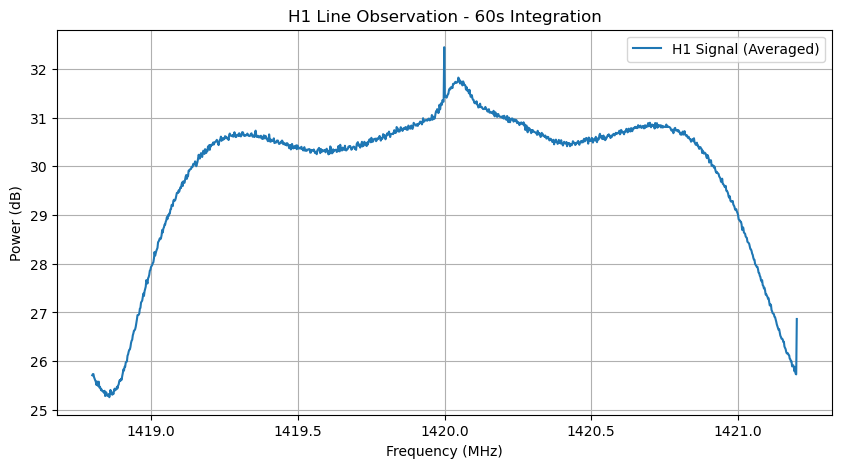

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from rtlsdr import RtlSdr
import time

# ---- SETTINGS ----
SAVE_FOLDER = r"C:\Users\DELL\OneDrive\Desktop\ProjH1\python rtlsdr data\v7"  # Ensure correct path
INTEGRATION_TIME = 60  # Seconds to integrate
BIN_SIZE = 2e3  # Bin size in Hz (adjust for frequency resolution)

# Generate a unique filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"105.csv"
save_path = os.path.join(SAVE_FOLDER, filename)

# Ensure folder exists
os.makedirs(SAVE_FOLDER, exist_ok=True)

# ---- RTL-SDR SETUP ----
sdr = RtlSdr()
sdr.sample_rate = 2.4e6  # 2.4 MHz sampling rate
sdr.center_freq = 1420.40575e6  # Set to 1420.40575 MHz
sdr.gain = 49.6  # Max gain

# ---- DATA COLLECTION ----
print(f"Capturing data for {INTEGRATION_TIME} seconds...")
start_time = time.time()

# Initialize power spectrum accumulation
n_samples = 256 * 1024  # 256K samples per read
num_bins = int(sdr.sample_rate / BIN_SIZE)
avg_spectrum = np.zeros(num_bins)

count = 0
while time.time() - start_time < INTEGRATION_TIME:
    samples = sdr.read_samples(n_samples)
    
    # Compute FFT
    spectrum = np.abs(np.fft.fftshift(np.fft.fft(samples)))**2
    
    # Re-bin data
    freqs = np.fft.fftshift(np.fft.fftfreq(len(samples), d=1/sdr.sample_rate)) + 1420e6
    bin_indices = np.digitize(freqs, np.linspace(freqs.min(), freqs.max(), num_bins)) - 1
    binned_spectrum = np.zeros(num_bins)
    
    for i in range(num_bins):
        binned_spectrum[i] = np.mean(spectrum[bin_indices == i]) if np.any(bin_indices == i) else 0
    
    # Accumulate
    avg_spectrum += binned_spectrum
    count += 1

# Compute final average
avg_spectrum /= count
sdr.close()

# Convert to dB
power_db = 10 * np.log10(avg_spectrum + 1e-10) #Avoid log(0)

# Get Date and Time for logging
current_date = datetime.datetime.now().strftime("%Y-%m-%d")
current_time = datetime.datetime.now().strftime("%H:%M:%S")

# Save data to CSV with Date, Time, and Bin Size
df = pd.DataFrame({
    "Date": current_date,
    "Time": current_time,
    "Frequency (Hz)": np.linspace(freqs.min(), freqs.max(), num_bins),
    "Power (dB)": power_db,
    "Bin Size (Hz)": BIN_SIZE
})

df.to_csv(save_path, index=False)

print(f"Data saved to {save_path}")

# ---- PLOT SPECTRUM ----
plt.figure(figsize=(10, 5))
plt.plot(df["Frequency (Hz)"] / 1e6, df["Power (dB)"], label="H1 Signal (Averaged)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB)")
plt.title(f"H1 Line Observation - {INTEGRATION_TIME}s Integration")
plt.legend()
plt.grid()
plt.show()


# Temp Calibration

P_sky (first 5 values): [852.5641755  839.53103724 842.56621044 835.1858248  830.68379822]
P_ground (first 5 values): [2406.01684145 2329.98091518 2367.56432286 2355.04758093 2357.34770964]
P_source (first 5 values): [720.0276059  721.04928885 716.77402848 704.46828685 706.38687262]
T_r (first 5 values): [156.90157401 161.16570584 157.9884195  157.10672933 155.51451707]
T_src (first 5 values before smoothing): [-20.16863815 -18.45071531 -19.33359974 -20.37182973 -19.0181174 ]
T_src_smooth (first 5 values before baseline subtraction): [-19.31446133 -19.69868422 -19.46858007 -18.87280418 -18.41763269]


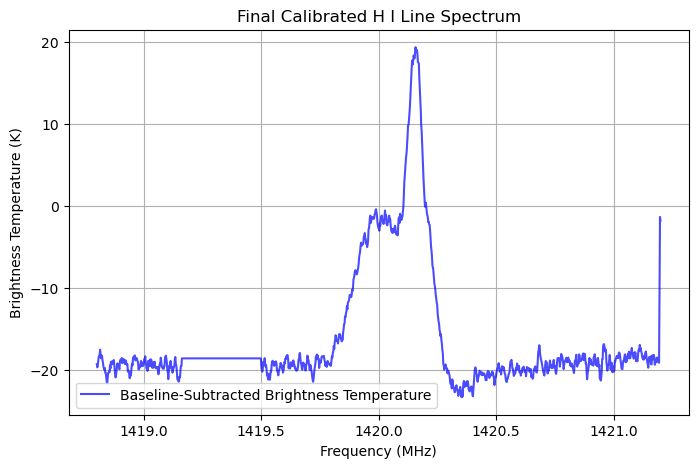

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.signal import savgol_filter
from scipy.ndimage import uniform_filter1d

# ---- Load Data ----
ground_data = pd.read_csv("C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v5\\g1.csv")  # Ground observation
sky_data = pd.read_csv("C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v5\\s3.csv")     # Sky observation
source_data = pd.read_csv("C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v5\\h1.csv")  # Source (Milky Way) observation

sky_data = pd.read_csv(sky_file_path)
ground_data = pd.read_csv(ground_file_path)
source_data = pd.read_csv(source_file_path)

# Extract frequency and power values
freq = sky_data["Frequency (Hz)"].values / 1e6  # Convert to MHz
P_sky_dB = sky_data["Power (dB)"].values
P_ground_dB = ground_data["Power (dB)"].values
P_source_dB = source_data["Power (dB)"].values

# Reference temperatures
T_gnd = 300  # Ground temperature (K)
T_sky = 5     # Sky temperature (K)

# Convert dB to linear scale
P_sky = 10**(P_sky_dB / 10)
P_ground = 10**(P_ground_dB / 10)
P_source = 10**(P_source_dB / 10)

#P_source = np.maximum(P_source, P_sky * 0.99)

# Compute receiver system temperature (T_r)
T_r = (T_sky * (P_ground / P_sky) - T_gnd) / (1 - (P_ground / P_sky))

# Compute calibrated brightness temperature for the source
T_src = ((T_gnd + T_r) / (P_ground / P_source)) - T_r


# Debugging: Print intermediate values
print("P_sky (first 5 values):", P_sky[:5])
print("P_ground (first 5 values):", P_ground[:5])
print("P_source (first 5 values):", P_source[:5])
print("T_r (first 5 values):", T_r[:5])
print("T_src (first 5 values before smoothing):", T_src[:5])

# Apply smoothing filter to T_src
T_src_smooth = uniform_filter1d(T_src, size=5)

print("T_src_smooth (first 5 values before baseline subtraction):", T_src_smooth[:5])


# Apply smoothing filter to T_src
T_src_smooth = uniform_filter1d(T_src, size=5)

# --- Manual Baseline Subtraction ---
tr1f = []
av1 = (np.mean(T_src_smooth[:50]) + np.mean(T_src_smooth[-50:])) / 2  # Compute average baseline value

for i in range(len(T_src_smooth)):
    if 180 < i < 350:  # Define the range to replace with baseline
        tr1f.append(av1)
    else:
        tr1f.append(T_src_smooth[i])
T_src_smooth = np.array(tr1f)


# Plot calibrated brightness temperature after baseline subtraction
plt.figure(figsize=(8, 5))
plt.plot(freq, T_src_smooth, label="Baseline-Subtracted Brightness Temperature", color="blue", alpha=0.7)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Brightness Temperature (K)")
plt.title("Final Calibrated H I Line Spectrum")
plt.legend()
plt.grid()
plt.show()

# Velocity Conversion

Columns in CSV: ['Frequency (MHz)', 'Brightness Temperature (K)']


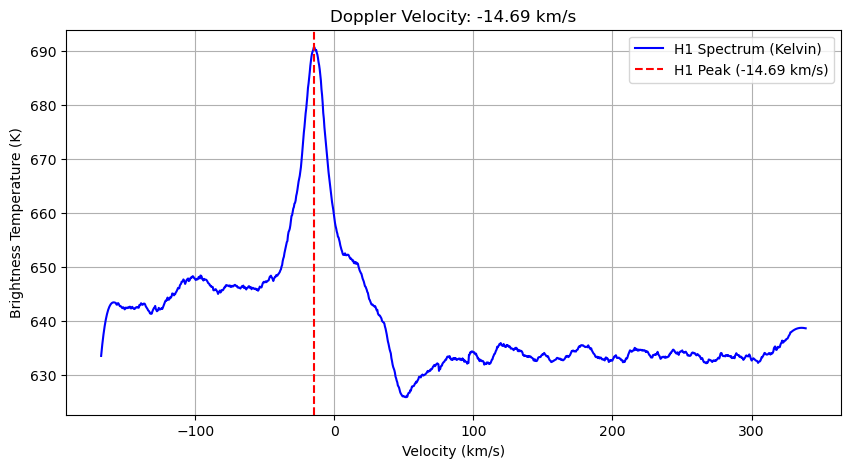

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# ---- SETTINGS ----
UPLOAD_FILE_PATH = r"C:\Users\sksam\OneDrive\Desktop\ProjH1\python rtlsdr data\v5\ild.csv"  # Replace with your file path
REST_FREQUENCY = 1420.4058e6  # Rest frequency of the H1 line in Hz
SPEED_OF_LIGHT = 299792.458  # Speed of light in km/s

# ---- LOAD DATA ----
df = pd.read_csv(UPLOAD_FILE_PATH)

# Strip column names of any whitespace
df.columns = df.columns.str.strip()

# Print column names to debug
print("Columns in CSV:", df.columns.tolist())

# Ensure the file has the correct columns
required_columns = ["Frequency (MHz)", "Brightness Temperature (K)"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"CSV file is missing the following required columns: {missing_columns}")

# Convert Frequency from MHz to Hz
df["Frequency (Hz)"] = df["Frequency (MHz)"] * 1e6

# Convert frequency to velocity using the Doppler formula
df["Velocity (km/s)"] = SPEED_OF_LIGHT * (REST_FREQUENCY - df["Frequency (Hz)"]) / REST_FREQUENCY

# Sort values by velocity (ensuring low to high order)
df = df.sort_values(by="Velocity (km/s)")

# ---- PLOT ----
plt.figure(figsize=(10, 5))
plt.plot(df["Velocity (km/s)"], df["Brightness Temperature (K)"], label="H1 Spectrum (Kelvin)", color="blue")

# Identify H1 peak
h1_peak_idx = df["Brightness Temperature (K)"].idxmax()
h1_peak_velocity = df.loc[h1_peak_idx, "Velocity (km/s)"]
plt.axvline(h1_peak_velocity, color="red", linestyle="dashed", label=f"H1 Peak ({h1_peak_velocity:.2f} km/s)")

plt.xlabel("Velocity (km/s)")
plt.ylabel("Brightness Temperature (K)")
plt.title(f"Doppler Velocity: {h1_peak_velocity:.2f} km/s")
plt.legend()
plt.grid()

# Show the plot
plt.show()




# calibration testing

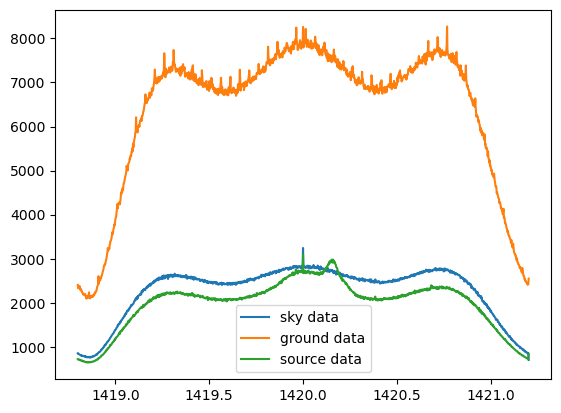

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from scipy.signal import find_peaks, savgol_filter

# Load sky, ground, and source data
sky_file_path = "C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v5\\s2.csv"
ground_file_path = "C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v5\\g2.csv"
source_file_path = "C:\\Users\\sksam\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v5\\h3.csv"

sky_data = pd.read_csv(sky_file_path)
ground_data = pd.read_csv(ground_file_path)
source_data = pd.read_csv(source_file_path)

# Extract frequency and power values
freq_sky = (sky_data["Frequency (Hz)"] / 1e6).values  # Convert to NumPy array
freq_gnd = (ground_data["Frequency (Hz)"] / 1e6).values
freq_src = (source_data["Frequency (Hz)"] / 1e6).values
sky_power_dB = sky_data["Power (dB)"]
ground_power_dB = ground_data["Power (dB)"]
source_power_dB = source_data["Power (dB)"]

# Convert dB to linear scale
P_sky = 10**(P_sky_dB / 10)
P_ground = 10**(P_ground_dB / 10)
P_source = 10**(P_source_dB / 10)

plt.plot(freq_sky, P_sky, label="sky data")
plt.plot(freq_gnd, P_ground, label="ground data")
plt.plot(freq_src, P_source, label="source data")
plt.legend()



In [302]:
T_sky=5
T_gnd=300

# Compute receiver system temperature (T_r)
T_r = (T_sky * (P_ground / P_sky) - T_gnd) / (1 - (P_ground / P_sky))

Text(0, 0.5, 'Temperature (K)')

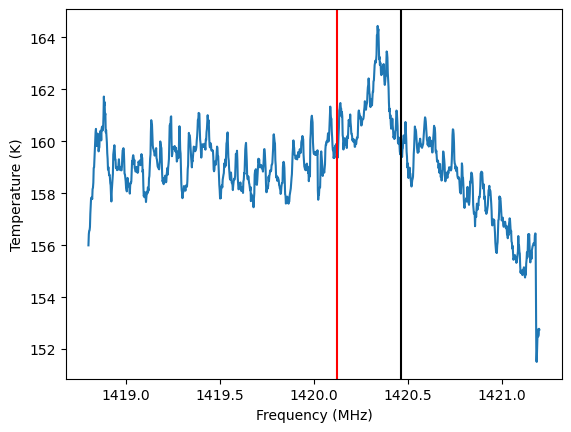

In [304]:
# Apply smoothing filter to T_src
T_r_s = uniform_filter1d(T_r, size=20)

start1= 660
stop1 = 830
plt.plot(freq_sky, T_r_s, label="receiver temp")
plt.axvline(freq_sky[start1], color = 'red')
plt.axvline(freq_sky[stop1], color = 'k')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Temperature (K)")

In [306]:
def make_line(array, start, stop):
    avg = (array[start]+array[stop])/2
    arr = np.zeros(len(array))
    for i in range(len(array)):
        if i > start and i < stop:
            arr[i] = avg
        else:
            arr[i] = array[i]
    print(avg)
    return arr

In [308]:
T_rc= make_line(T_r, start1, stop1)

158.95172171423144


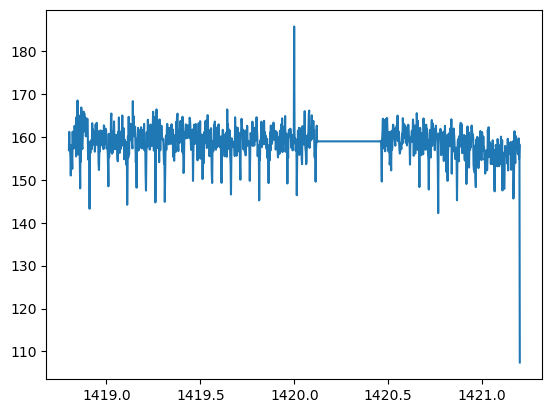

In [296]:
plt.plot(freq_sky, T_rc, label="receiver temp")

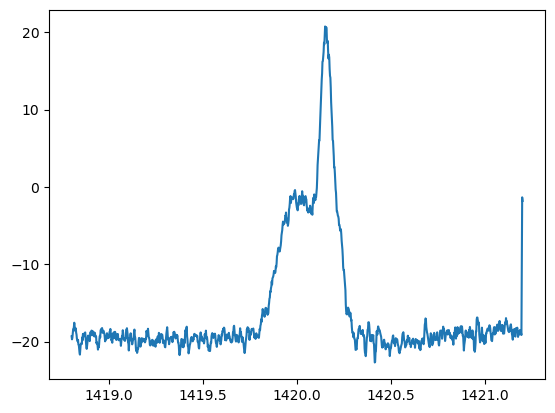

In [310]:
# Compute calibrated brightness temperature for the source
T_src = ((T_gnd + T_rc) / (P_ground / P_source)) - T_rc

T_sc = uniform_filter1d(T_src, size=5)

plt.plot(freq_src, T_sc, label="source l = 0")

# New version

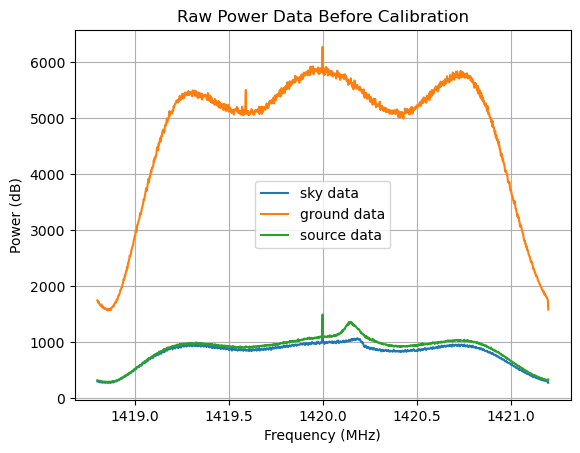

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from scipy.signal import find_peaks, savgol_filter

# Load sky, ground, and source data
sky_file_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v7\\s3.csv"
ground_file_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v7\\g3.csv"
source_file_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\ProjH1\\python rtlsdr data\\v7\\355.csv"

sky_data = pd.read_csv(sky_file_path)
ground_data = pd.read_csv(ground_file_path)
source_data = pd.read_csv(source_file_path)

# Extract frequency and power values
freq_sky = (sky_data["Frequency (Hz)"] / 1e6).values  # Convert to NumPy array
freq_gnd = (ground_data["Frequency (Hz)"] / 1e6).values
freq_src = (source_data["Frequency (Hz)"] / 1e6).values
sky_power_dB = sky_data["Power (dB)"]
ground_power_dB = ground_data["Power (dB)"]
source_power_dB = source_data["Power (dB)"]

# ---- Convert dB to Linear Scale ----
P_ground = 10 ** (ground_power_dB / 10)
P_sky = 10 ** (sky_power_dB / 10)
P_source = 10 ** (source_power_dB / 10)



plt.plot(freq_sky, P_sky, label="sky data")
plt.plot(freq_gnd, P_ground, label="ground data")
plt.plot(freq_src, P_source, label="source data")
plt.legend()

plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB)")
plt.title("Raw Power Data Before Calibration")
plt.legend()
plt.grid()
plt.show()


# ---- Baseline Correction (Optional) ----
P_ground_s = savgol_filter(P_ground, window_length=51, polyorder=3)
P_sky_s = savgol_filter(P_sky, window_length=51, polyorder=3)
P_source_s = savgol_filter(P_source, window_length=51, polyorder=3)


53.84350757210285


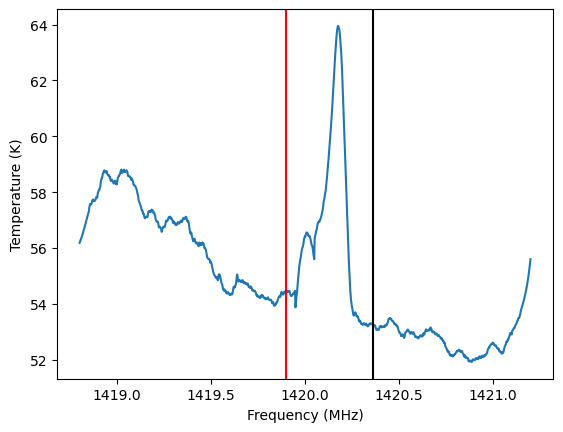

In [3]:
T_sky=5
T_gnd=300

# Compute receiver system temperature (T_r)
T_r = (T_sky * (P_ground_s / P_sky_s) - T_gnd) / (1 - (P_ground_s / P_sky_s))

start1= 550
stop1 = 780



plt.plot(freq_sky, T_r, label="receiver temp")
plt.axvline(freq_sky[start1], color = 'red')
plt.axvline(freq_sky[stop1], color = 'k')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Temperature (K)")

def make_line(array, start, stop):
    avg = (array[start]+array[stop])/2
    arr = np.zeros(len(array))
    for i in range(len(array)):
        if i > start and i < stop:
            arr[i] = avg
        else:
            arr[i] = array[i]
    print(avg)
    return arr

T_rc= make_line(T_r, start1, stop1)

53.84350757210285


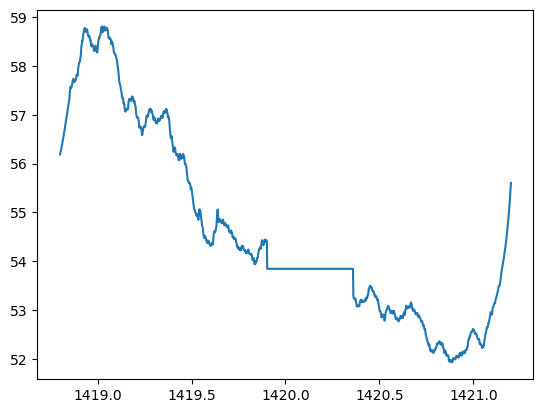

In [5]:
T_rc= make_line(T_r, start1, stop1)
plt.plot(freq_sky, T_rc, label="receiver temp")

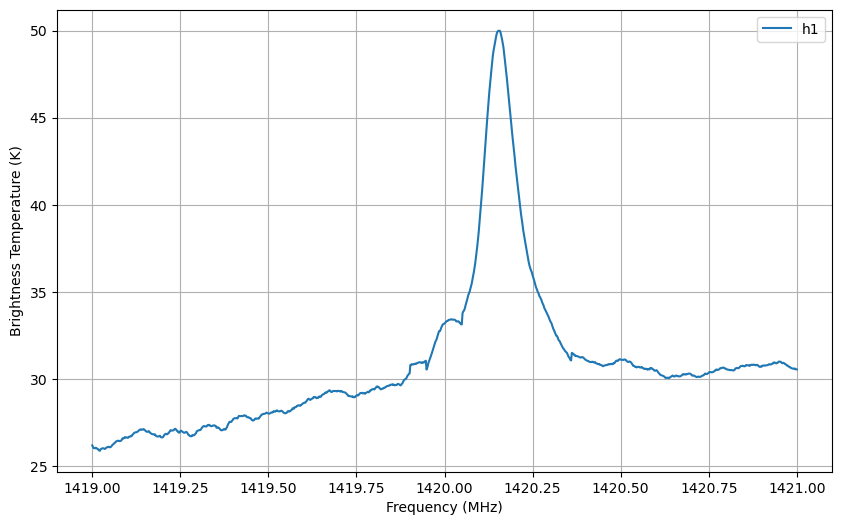

In [7]:
# Compute calibrated brightness temperature for the source
T_src = ((T_gnd + T_rc) / (P_ground_s / P_source_s)) - T_rc
T_s = T_src + 20  # Shift values to bring them above zero

# Define frequency range to keep (adjust as needed)
freq_min = 1419.0  # MHz
freq_max = 1421.0  # MHz

# Apply mask to keep only frequencies in the selected range
mask = (freq_src >= freq_min) & (freq_src <= freq_max)

# Trim the frequency and brightness temperature data
freq_src_t = freq_src[mask]
T_s_t = T_s[mask]

# Plot the trimmed data
plt.figure(figsize=(10,6))
plt.plot(freq_src_t, T_s_t, label="h1")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Brightness Temperature (K)")
plt.legend()
plt.grid()
plt.show()


Peak Velocity: 53.32 km/s, Peak Temperature: 49.99 K


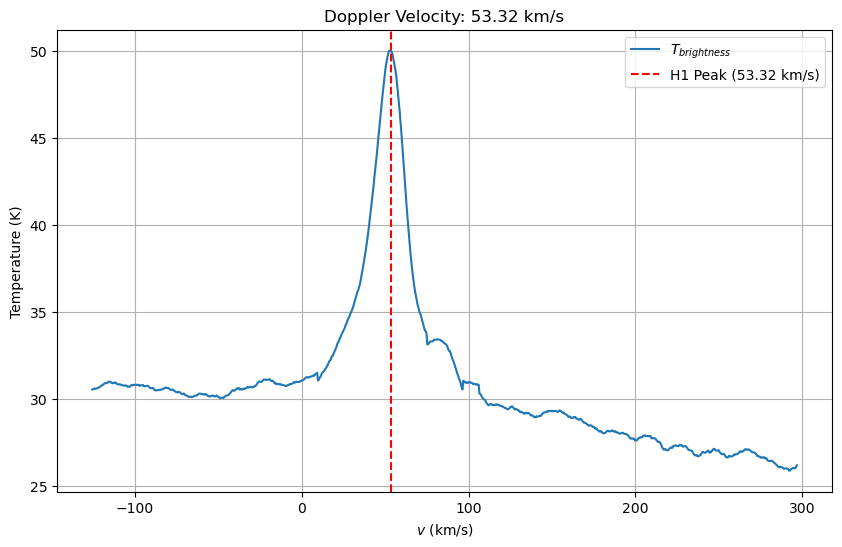

In [9]:
c = 299792.458

v = c* (1- freq_src_t/1420.405751768)

# Find highest peak and corresponding velocity
peak_idx = np.argmax(T_s_t)
peak_velocity = v[peak_idx]
peak_temperature = T_s_t[peak_idx]

print(f"Peak Velocity: {peak_velocity:.2f} km/s, Peak Temperature: {peak_temperature:.2f} K")


plt.figure(figsize=(10,6))
plt.grid()
plt.plot(v, T_s_t, label='$T_{brightness}$')
plt.axvline(peak_velocity, color="red", linestyle="dashed", label=f"H1 Peak ({peak_velocity:.2f} km/s)")
#plt.xticks(range(-250,250,50))
plt.title(f"Doppler Velocity: {peak_velocity:.2f} km/s")
plt.xlabel('$v$ (km/s)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()

RA:  263.6151888301696
DEC:  -32.761090738167724


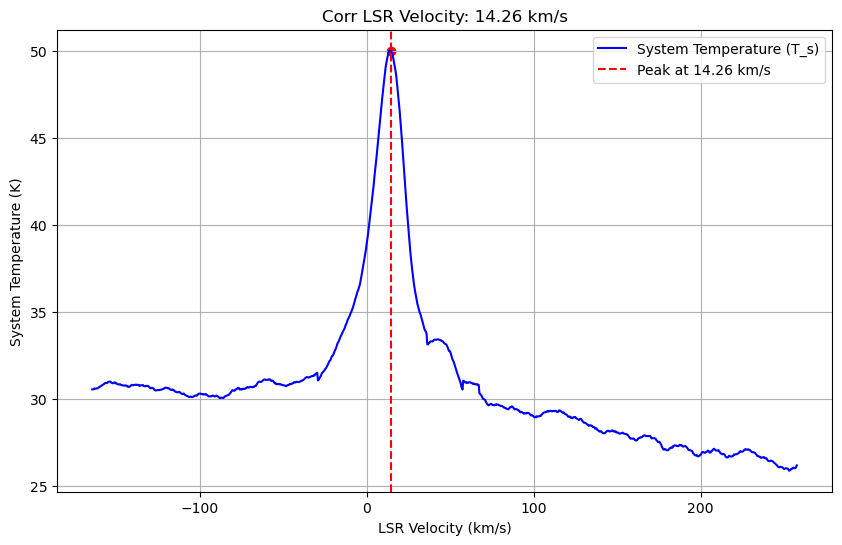

Peak System Temperature: 49.99 K at LSR Velocity: 14.26 km/s


In [11]:
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, ICRS, Galactic, Angle
from astropy.coordinates import get_sun
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
import math

def compute_lsr_velocity(az, el, lat, lon, alt, obs_time, v_obs):
    """
    Convert Azimuth/Elevation to LSR velocity correction.
    
    Parameters:
    az (float): Azimuth in degrees
    el (float): Elevation in degrees
    lat (float): Latitude of observer in degrees
    lon (float): Longitude of observer in degrees
    alt (float): Altitude of observer in meters
    obs_time (str): Observation time in 'YYYY-MM-DD HH:MM:SS' UTC format
    v_obs (array): Observed velocity from Doppler shift (km/s)
    
    Returns:
    array: LSR-corrected velocity (km/s)
    """
    # Define observer location
    location = EarthLocation(lat=lat*u.deg, lon=lon*u.deg, height=alt*u.m)
    
    # Convert observation time to Astropy Time object
    # Convert IST to UTC (IST is UTC+5:30)
    ist_time = Time(obs_time)
    utc_time = ist_time - 5.5 * u.hour
    time = utc_time
    
    # Compute Local Sidereal Time (LST)
    lst = time.sidereal_time('apparent', longitude=lon*u.deg)
    
    # Define AltAz frame
    altaz = AltAz(obstime=time, location=location)
    
    # Convert Az/El to RA/Dec
    source_altaz = AltAz(az=az*u.deg, alt=el*u.deg, obstime=time, location=location)
    from astropy.coordinates import SkyCoord
    source_altaz = SkyCoord(az=az*u.deg, alt=el*u.deg, frame=AltAz(obstime=time, location=location))
    source_radec = source_altaz.transform_to(ICRS)
    ra = source_radec.ra.deg  # Right Ascension
    dec = source_radec.dec.deg  # Declination

    print("RA: ", ra)
    print("DEC: ", dec)
    
    # Compute Barycentric correction
    #jd = pyasl.jdcnv(time)
    jd = time.jd  # Convert observation time to Julian Date
    corr, hjd = pyasl.helcorr(lon, lat, alt, ra, dec, jd, debug=False)
    
    # Compute Solar Apex motion correction
    v_sun = 20.5  # km/s (Sun's peculiar velocity relative to LSR)
    sun_ra = math.radians(270.2)
    sun_dec = math.radians(28.7)
    obs_ra = math.radians(ra)
    obs_dec = math.radians(dec)
    
    a = math.cos(sun_dec) * math.cos(obs_dec)
    b = (math.cos(sun_ra) * math.cos(obs_ra)) + (math.sin(sun_ra) * math.sin(obs_ra))
    c = math.sin(sun_dec) * math.sin(obs_dec)
    v_rs = v_sun * ((a * b) + c)
    
    # Compute final LSR velocity correction
    v_lsr = corr + v_rs  # Apply same convention as instructor
    
    # Compute LSR-corrected velocity
    v_lsr_corrected = v_obs - v_lsr  # Standard convention
    
    return v_lsr_corrected

# Example usage
azimuth = 200  # Replace with actual Azimuth in degrees
elevation = 36.0  # Replace with actual Elevation in degrees
latitude = 18.0   # Replace with telescope latitude in degrees
longitude = 78.0  # Replace with telescope longitude in degrees
altitude = 474    # Replace with telescope altitude in meters
obs_time = "2025-03-12 7:51:00"  # Replace with actual observation time (UTC)
v_obs = v  # Replace with observed velocity from Doppler shift (km/s)

v_lsr_final = compute_lsr_velocity(azimuth, elevation, latitude, longitude, altitude, obs_time, v_obs)


# Find the peak of T_s
peak_index = np.argmax(T_s_t)
peak_velocity = v_lsr_final[peak_index]
peak_temp = T_s_t[peak_index]

# Plot T_s vs. LSR Velocity
plt.figure(figsize=(10,6))
plt.plot(v_lsr_final, T_s_t, label='System Temperature (T_s)', linestyle='solid', color='blue')

# Mark the peak
plt.axvline(x=peak_velocity, color='red', linestyle='dashed', label=f'Peak at {peak_velocity:.2f} km/s')
plt.scatter(peak_velocity, peak_temp, color='red', marker='o')

plt.xlabel("LSR Velocity (km/s)")
plt.ylabel("System Temperature (K)")
plt.title(f"Corr LSR Velocity: {peak_velocity:.2f} km/s")
plt.legend()
plt.grid()
plt.show()

# Print peak values
print(f"Peak System Temperature: {peak_temp:.2f} K at LSR Velocity: {peak_velocity:.2f} km/s")


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian function
def gaussian(x, amplitude, mean, sigma, shift):
    return amplitude * np.exp(-((x - mean)**2) / (2 * sigma**2)) + shift

# Sum of multiple Gaussians
def sum_of_gaussians(x, *params):
    n_gaussians = len(params) // 4  # 4 parameters per Gaussian
    y = np.zeros_like(x)
    for i in range(n_gaussians):
        amplitude = params[4 * i]
        mean = params[4 * i + 1]
        sigma = params[4 * i + 2]
        shift = params[4 * i + 3]
        y += gaussian(x, amplitude, mean, sigma, shift)
    return y

# Fit function
def fit_gaussians(x_data, y_data, n_gaussians, initial_guesses):
    if len(initial_guesses) != n_gaussians * 4:
        raise ValueError("Initial guesses must have 4 parameters per Gaussian (amp, mean, sigma, shift).")
    try:
        popt, _ = curve_fit(lambda x, *params: sum_of_gaussians(x, *params), x_data, y_data, p0=initial_guesses)
        return popt
    except Exception as e:
        print(f"Fitting failed: {e}")
        return None

# Your data (Replace with actual variables)
x_data = v_lsr_final  # LSR velocity
y_data = T_s_t          # Brightness Temperature

# Number of Gaussians to fit
n_gaussians = 8  # Adjust as needed

# Initial guesses [amp1, mean1, sigma1, shift1, amp2, mean2, sigma2, shift2, ...]
initial_guesses = [62.5, 32, 20, 0, 5, 105, 10, 0, 5, 85, 10, 0, 5, -20, 10, 0, 5, 260, 10, 0, 10, 1, 5, 0, 5, 140, 10, 0, 5, -160, 10, 0]  # Adjust manually

# Fit the data
popt = fit_gaussians(x_data, y_data, n_gaussians, initial_guesses)

# Plot results
if popt is not None:
    fitted_y = sum_of_gaussians(x_data, *popt)
    residuals = y_data - fitted_y  # Compute residuals

    plt.figure(figsize=(10, 6))

    # Plot original data and fit
    plt.plot(2, 1, 1)
    plt.scatter(x_data, y_data, s=10, label="$T_s$ (Observed)", color="blue")
    plt.plot(x_data, fitted_y, label="Fitted Gaussians", color="red")
    plt.axvline(popt[1], color='green', linestyle='dotted', label=f'Peak 1 at {popt[1]:.2f} km/s')
   # plt.axvline(popt[5], color='purple', linestyle='dotted', label=f'Peak 2 at {popt[5]:.2f} km/s')
    plt.legend()
    plt.xlabel('$v_{LSR}$ (km/s)')
    plt.ylabel('Temperature (K)')
    plt.title("Gaussian Fit")
    plt.grid()

    plt.figure(figsize=(10, 6))
    # Plot residuals
    plt.plot(2, 1, 2)
    plt.scatter(x_data, residuals, s=10, color='black', label="Residuals")
    plt.axhline(0, color='red', linestyle='dashed')
    plt.xlabel('$v_{LSR}$ (km/s)')
    plt.ylabel('Residuals (K)')
    plt.title("Residuals of Fit")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

    print(f"Peak 1 Velocity: {popt[1]:.2f} km/s")
    #print(f"Peak 2 Velocity: {popt[5]:.2f} km/s")


Fitting failed: Optimal parameters not found: Number of calls to function has reached maxfev = 6600.


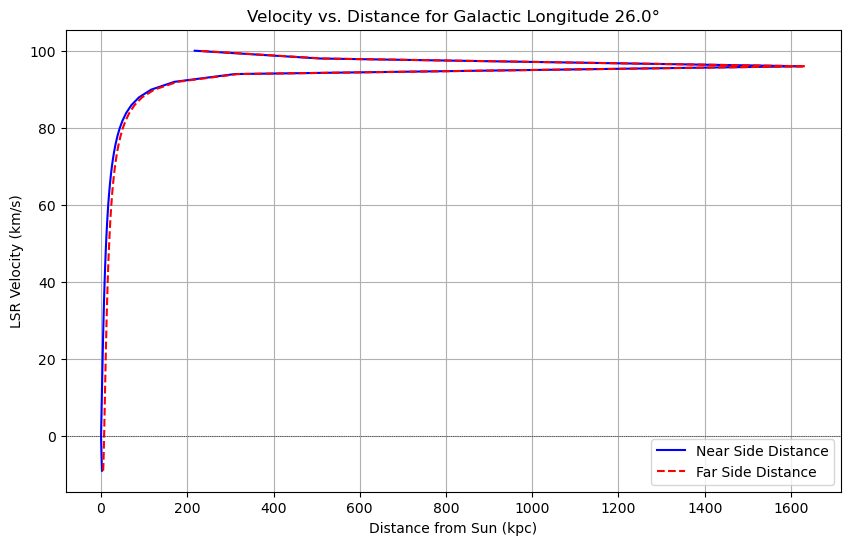

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
V0 = 220  # km/s (solar rotation velocity)
R0 = 8.15  # kpc (distance from Galactic center)
l = np.radians(26)  # Convert longitude to radians

# Generate velocity range (from -100 km/s to +100 km/s)
V_LSR = np.linspace(-100, 100, 100)

# Solve for Galactocentric radius R (kpc)
R = R0 * V0 / (V0 - V_LSR / np.sin(l))

# Compute the inner sqrt() safely
sqrt_term = R**2 - R0**2 * np.cos(l)**2
valid_sqrt = sqrt_term >= 0  # Avoid negative values

# Compute kinematic distances (only for valid cases)
D_near = np.full_like(V_LSR, np.nan)  # Default NaN
D_far = np.full_like(V_LSR, np.nan)

D_near[valid_sqrt] = np.abs(R0 * np.sin(l) - np.sqrt(sqrt_term[valid_sqrt]))
D_far[valid_sqrt] = np.abs(R0 * np.sin(l) + np.sqrt(sqrt_term[valid_sqrt]))

# Plot Velocity vs. Distance
plt.figure(figsize=(10, 6))
plt.plot(D_near, V_LSR, label="Near Side Distance", color='blue')
plt.plot(D_far, V_LSR, label="Far Side Distance", color='red', linestyle="dashed")

# Mark the observed velocity
V_observed = -68.22
R_observed = R0 * V0 / (V0 - V_observed / np.sin(l))
sqrt_obs = R_observed**2 - R0**2 * np.cos(l)**2

if sqrt_obs >= 0:
    D_observed_near = np.abs(R0 * np.sin(l) - np.sqrt(sqrt_obs))
    D_observed_far = np.abs(R0 * np.sin(l) + np.sqrt(sqrt_obs))
    plt.scatter([D_observed_near, D_observed_far], [V_observed, R_observed], color="black", marker="o", label="Observed V_LSR")

# Labels and legend
plt.xlabel("Distance from Sun (kpc)")
plt.ylabel("LSR Velocity (km/s)")
plt.title(f"Velocity vs. Distance for Galactic Longitude {np.degrees(l):.1f}°")
plt.axhline(0, color="black", linewidth=0.5, linestyle="dotted")
plt.legend()
plt.grid()

# Show plot
plt.show()


In [3]:
!pip install PyAstronomy


     ---------------------------------------- 0.0/779.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/779.3 kB ? eta -:--:--
     ------------- -------------------------- 262.1/779.3 kB ? eta -:--:--
     ------------------------ ----------- 524.3/779.3 kB 929.6 kB/s eta 0:00:01
     ------------------------ ----------- 524.3/779.3 kB 929.6 kB/s eta 0:00:01
     ------------------------------------ 779.3/779.3 kB 806.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PyAstronomy: filename=PyAstronomy-0.22.0-py3-none-any.whl size=557919 sha256=61b2c69825c9982bdc8f5b7c5066b90be388928571d195f5f272208d4ce44645
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\47\63\ad\5abbbaef471e077d8f8d5f4dacbd0b93d689cf8451fee8bc19
Successfully built PyAstronomy


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import requests
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
import astropy.units as u
from astropy.time import Time
from numpy import *
from scipy.signal import argrelextrema
from PyAstronomy import pyasl
import math
import datetime

def to_equatorial(az, alt, time=False, loc=False, output_obj=False, degree=True):
    utcoffset = +5.5*u.hour #Eastern Daylight Time

    if loc:
        lat, lon, h = loc
        location = EarthLocation(lat=lat*u.deg, lon=lon*u.deg, height=h*u.m)
    else:
        location = EarthLocation(lat=28.9931*u.deg, lon=77.0151*u.deg, height=224*u.m)

    if time:
        time_utc = Time(datetime.datetime(*time)) - utcoffset
        horizontal = SkyCoord(AltAz(alt=alt*u.degree, az=az*u.degree, location=location, obstime=time_utc))
        equatorial = horizontal.transform_to('icrs')
    else:
        current_time = datetime.datetime.now()
        time_utc = Time(current_time) - utcoffset

        horizontal = SkyCoord(AltAz(alt=alt*u.degree, az=az*u.degree, location=location, obstime=time_utc))
        equatorial = horizontal.transform_to('icrs')

    if output_obj:
        return equatorial
    else:
        if degree:
            return equatorial.ra.degree, equatorial.dec.degree
        else:
            return equatorial.ra.radian, equatorial.dec.radian


def to_galactic(az, alt, time=False, loc=False, output_obj=False, degree=True):
    utcoffset = +5.5*u.hour #Eastern Daylight Time

    if loc:
        lat, lon, h = loc
        location = EarthLocation(lat=lat*u.deg, lon=lon*u.deg, height=h*u.m)
    else:
        location = EarthLocation(lat=28.9931*u.deg, lon=77.0151*u.deg, height=224*u.m)

    if time:
        time_utc = Time(datetime.datetime(*time)) - utcoffset
        horizontal = SkyCoord(AltAz(alt=alt*u.degree, az=az*u.degree, location=location, obstime=time_utc))
        galactic = horizontal.transform_to('galactic')
    else:
        current_time = datetime.datetime.now()
        time_utc = Time(current_time) - utcoffset

        horizontal = SkyCoord(AltAz(alt=alt*u.degree, az=az*u.degree, location=location, obstime=time_utc))
        galactic = horizontal.transform_to('galactic')
    if output_obj:
        return galactic
    else:
        if degree:
            return galactic.l.degree, galactic.b.degree
        else:
            return galactic.l.radian, galactic.b.radian






def lsr(az, alt, time, location=EarthLocation(lat=18.042*u.deg, lon=78.263*u.deg, height=600*u.m)):
    equatorial = to_equatorial(az, alt, time=time, output_obj=True, degree=False)
    ra_rad = equatorial.ra.radian
    dec_rad = equatorial.dec.radian
    
    if time==False:
        barycorr = equatorial.radial_velocity_correction(obstime=Time(datetime.datetime.now()))#, location=sonipat)
        barycorr = barycorr.to(u.km/u.s)
        heliocorr = equatorial.radial_velocity_correction('heliocentric', obstime=Time(datetime.datetime.now()))#, location=sonipat)
        heliocorr = heliocorr.to(u.km/u.s)
    else:
        barycorr = equatorial.radial_velocity_correction(obstime=Time(datetime.datetime(*time)))#, location=sonipat)
        barycorr = barycorr.to(u.km/u.s)
        heliocorr = equatorial.radial_velocity_correction('heliocentric', obstime=Time(datetime.datetime(*time)))#, location=sonipat)
        heliocorr = heliocorr.to(u.km/u.s)

    v_sun = 20.5*(u.km/u.s)
    sun_ra = (270*pi/180)*u.radian
    sun_dec = (30*pi/180)*u.radian

    a = np.cos(sun_dec)*np.cos(dec_rad)
    b = (np.cos(sun_ra)*np.cos(ra_rad)) + (np.sin(sun_ra)*np.sin(ra_rad))
    c = np.sin(sun_dec)*np.sin(dec_rad)
    v_rs = v_sun*(a*b + c)
    lsr =  v_rs + heliocorr
    
    return lsr

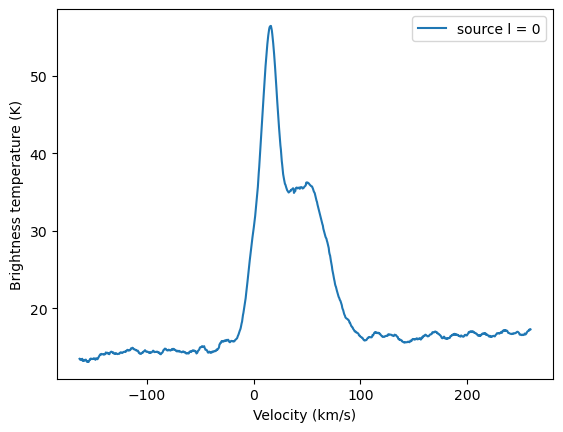

In [139]:
lsr0 = lsr(194, 54, (2025, 2, 25, 21, 43, 53)).value
lsr_source0 = v_obs+lsr0


plt.plot(lsr_source0, T_s_t, label="source l = 0")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Brightness temperature (K)")
plt.legend()


----- HELCORR.PRO - DEBUG INFO - START ----
(obs_long (East positive),obs_lat,obs_alt) Observatory coordinates [deg,m]:  78.263 18.042 554
(ra,dec) Object coordinates (for epoch 2000.0) [deg]:  46.78270833333333 58.32505555555556
(ra,dec) Object coordinates (precessed to epoch 2019.199543) [deg]:  47.15552891282801 58.39799626470607
(ut) Universal time (middle of exposure) [hrs]:  15.828611109405756
(jd) Julian date (middle of exposure) (JD):  2458527.159525463
(hjd) Heliocentric Julian date (middle of exposure) (HJD):  2458527.160245815
(gmst) Greenwich mean sidereal time [hrs]:  1.322463095304954
(lmst) Local mean sidereal time [hrs]:  6.53999642863829
(dlat) Latitude correction [deg]:  -406.90038620458773
(lat) Geocentric latitude of observer [deg]:  17.92897211494317
(r) Distance of observer from center of earth [m]:  6376702.80773615
(v) Rotational velocity of earth at the position of the observer [km/s]:  0.4649965565017059
(vdiurnal) Projected earth rotation and earth-moon revo

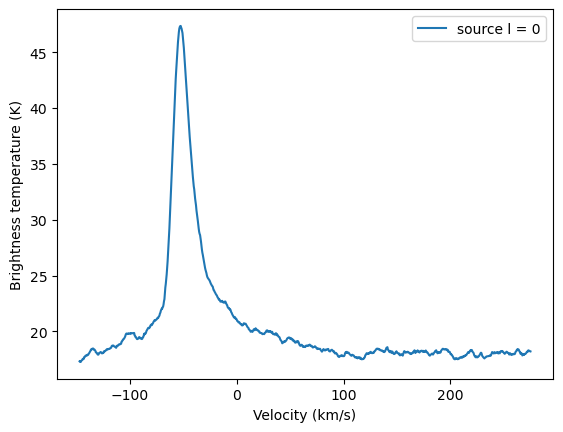

In [87]:
#!/usr/bin/env python
# coding: utf-8

# In[9]:

# PyAstronomy package requireq: https://pyastronomy.readthedocs.io/en/latest/index.html

from __future__ import print_function, division
from PyAstronomy import pyasl
import math
import datetime

# Coordinates of telescope
longitude = 78.263
latitude = 18.042
altitude = 554

# Coordinates of source (RA2000, DEC2000) RA_hr RA_min RA_sec DEC_deg DEC_min DEC_sec. Note DEC must be signed + or -.
hd1 = "03 07 07.85 +58 19 30.20"
obs_ra_2000, obs_dec_2000 = pyasl.coordsSexaToDeg(hd1)

# Time of observation converted to Julian Date
dt = datetime.datetime(2025, 3, 6, 10, 10, 43)
jd = pyasl.jdcnv(dt)

# Calculate barycentric correction (debug=True show
# various intermediate results)
corr, hjd = pyasl.helcorr(longitude, latitude, altitude, obs_ra_2000, obs_dec_2000, jd, debug=True)

#print("Barycentric correction [km/s]: ", corr)
#print("Heliocentric Julian day: ", hjd)

# Calculate LSR correction
v_sun = 20.5 # peculiar velocity (km/s) of sun w.r.t. LSR (The Solar Apex. Nature 162, 920 (1948). https://doi.org/10.1038/162920a0)
# solar apex
sun_ra = math.radians(270.2)
sun_dec = math.radians(28.7)

obs_dec = math.radians(obs_dec_2000)
obs_ra = math.radians(obs_ra_2000)

# equation from https://icts-yebes.oan.es/reports/doc/IT-CDT-2014-10.pdf
a = math.cos(sun_dec) * math.cos(obs_dec)
b = (math.cos(sun_ra) * math.cos(obs_ra)) + (math.sin(sun_ra) * math.sin(obs_ra))
c = math.sin(sun_dec) * math.sin(obs_dec)
v_rs = v_sun * ((a * b) + c)

v_lsr = corr + v_rs
print("LSR correction [km/s]: ", -v_lsr)
print("Positive value means receding (redshift) source, negative value means approaching (blueshift) source")


lsr_source0 = v_obs+v_lsr


plt.plot(lsr_source0, T_s_t, label="source l = 0")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Brightness temperature (K)")
plt.legend()

In [89]:
def to_galactic(az, alt, time=False, loc=False, output_obj=False, degree=True):
    utcoffset = +5.5*u.hour #Eastern Daylight Time

    if loc:
        lat, lon, h = loc
        location = EarthLocation(lat=lat*u.deg, lon=lon*u.deg, height=h*u.m)
    else:
        location = EarthLocation(lat=28.9931*u.deg, lon=77.0151*u.deg, height=224*u.m)

    if time:
        time_utc = Time(datetime.datetime(*time)) - utcoffset
        horizontal = SkyCoord(AltAz(alt=alt*u.degree, az=az*u.degree, location=location, obstime=time_utc))
        galactic = horizontal.transform_to('galactic')
    else:
        current_time = datetime.datetime.now()
        time_utc = Time(current_time) - utcoffset

        horizontal = SkyCoord(AltAz(alt=alt*u.degree, az=az*u.degree, location=location, obstime=time_utc))
        galactic = horizontal.transform_to('galactic')
    if output_obj:
        return galactic
    else:
        if degree:
            return galactic.l.degree, galactic.b.degree
        else:
            return galactic.l.radian, galactic.b.radian


ra, dec = to_equatorial(194, 54, (2025, 3, 6, 10, 10, 53))
print(ra, dec)

302.8555548867474 -6.198606364162687


In [ ]:
new method

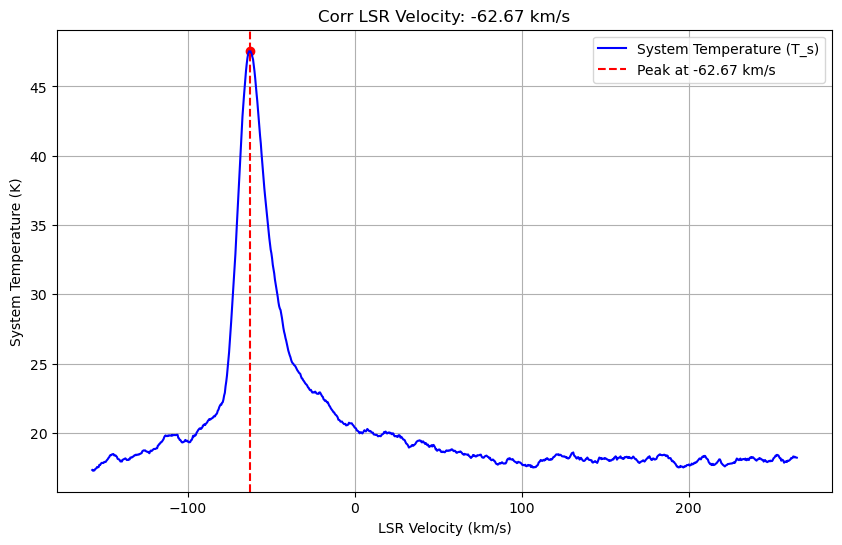

Peak System Temperature: 47.58 K at LSR Velocity: -62.67 km/s


In [187]:
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, ICRS, SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
import math

def compute_lsr_velocity(az, el, lat, lon, alt, obs_time, v_obs):
    """
    Convert observed velocity to Local Standard of Rest (LSR) velocity.

    Parameters:
    az (float): Azimuth in degrees
    el (float): Elevation in degrees
    lat (float): Latitude of observer in degrees
    lon (float): Longitude of observer in degrees
    alt (float): Altitude of observer in meters
    obs_time (str): Observation time in 'YYYY-MM-DD HH:MM:SS' UTC format
    v_obs (array): Observed velocity from Doppler shift (km/s)

    Returns:
    array: LSR-corrected velocity (km/s)
    """
    # Define observer location
    location = EarthLocation(lat=lat*u.deg, lon=lon*u.deg, height=alt*u.m)
    
    # Convert observation time to UTC
    ist_time = Time(obs_time)
    utc_time = ist_time - 5.5 * u.hour  # Convert IST to UTC
    time = utc_time
    
    # Convert Az/El to RA/Dec
    source_altaz = AltAz(az=az*u.deg, alt=el*u.deg, obstime=time, location=location)
    source_radec = SkyCoord(source_altaz).transform_to(ICRS)
    ra = source_radec.ra.deg
    dec = source_radec.dec.deg

    # Compute Heliocentric correction
    jd = time.jd  # Convert observation time to Julian Date
    v_helio, hjd = pyasl.helcorr(lon, lat, alt, ra, dec, jd, debug=False)

    # Compute Solar Apex motion correction (V_sun = 20.5 km/s)
    V_sun = 20.5  # km/s (Sun's motion relative to LSR)
    sun_ra = math.radians(270.2)
    sun_dec = math.radians(28.7)
    obs_ra = math.radians(ra)
    obs_dec = math.radians(dec)

    # Compute velocity projection along the solar motion
    a = math.cos(sun_dec) * math.cos(obs_dec)
    b = (math.cos(sun_ra) * math.cos(obs_ra)) + (math.sin(sun_ra) * math.sin(obs_ra))
    c = math.sin(sun_dec) * math.sin(obs_dec)
    v_solar_motion = V_sun * ((a * b) + c)

    # Compute final LSR velocity correction
    v_lsr_corrected = v_obs - v_helio - v_solar_motion  # Standard convention

    return v_lsr_corrected

# Example usage
azimuth = 194.0  
elevation = 54.0  
latitude = 18.0   
longitude = 78.0  
altitude = 600    
obs_time = "2025-03-6 10:10:00"  
v_obs = v  # Replace with observed velocity

v_lsr_final = compute_lsr_velocity(azimuth, elevation, latitude, longitude, altitude, obs_time, v_obs)

# Find the peak of T_s
peak_index = np.argmax(T_s_t)
peak_velocity = v_lsr_final[peak_index]
peak_temp = T_s_t[peak_index]

# Plot T_s vs. LSR Velocity
plt.figure(figsize=(10,6))
plt.plot(v_lsr_final, T_s_t, label='System Temperature (T_s)', linestyle='solid', color='blue')

# Mark the peak
plt.axvline(x=peak_velocity, color='red', linestyle='dashed', label=f'Peak at {peak_velocity:.2f} km/s')
plt.scatter(peak_velocity, peak_temp, color='red', marker='o')

plt.xlabel("LSR Velocity (km/s)")
plt.ylabel("System Temperature (K)")
plt.title(f"Corr LSR Velocity: {peak_velocity:.2f} km/s")
plt.legend()
plt.grid()
plt.show()

# Print peak values
print(f"Peak System Temperature: {peak_temp:.2f} K at LSR Velocity: {peak_velocity:.2f} km/s")


In [17]:
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, ICRS, Galactic, SkyCoord
import astropy.units as u

# Given observation parameters
azimuth = 210.2 * u.deg
elevation = 54.5 * u.deg  # Changed to match Stellarium more closely
latitude = 18.0 * u.deg
longitude = 78.0 * u.deg
altitude = 600 * u.m

# Convert IST to UTC (subtract 5 hours 30 minutes)
obs_time_ist = "2025-03-06 10:04:00"  # Given in IST
obs_time_utc = Time(obs_time_ist) - 5.5 * u.hour  # Convert to UTC

# Define observer's location
location = EarthLocation(lat=latitude, lon=longitude, height=altitude)

# Convert Az/El to RA/Dec
altaz_frame = AltAz(obstime=obs_time_utc, location=location)
source_altaz = SkyCoord(az=azimuth, alt=elevation, frame=AltAz(obstime=obs_time_utc, location=location))
source_radec = source_altaz.transform_to(ICRS)

# Convert RA/Dec to Galactic coordinates
source_galactic = source_radec.transform_to(Galactic)

# Extract Galactic longitude (l) and latitude (b)
galactic_l = source_galactic.l.deg
galactic_b = source_galactic.b.deg

# Print the results
print(f"Galactic Longitude (l): {galactic_l:.2f}°")
print(f"Galactic Latitude (b): {galactic_b:.2f}°")


Galactic Longitude (l): 25.54°
Galactic Latitude (b): -14.72°


In [19]:
#!/usr/bin/env python
# coding: utf-8

# In[9]:

# PyAstronomy package requireq: https://pyastronomy.readthedocs.io/en/latest/index.html

from __future__ import print_function, division
from PyAstronomy import pyasl
import math
import datetime

# Coordinates of telescope
longitude = 78
latitude = 18
altitude = 554

# Coordinates of source (RA2000, DEC2000) RA_hr RA_min RA_sec DEC_deg DEC_min DEC_sec. Note DEC must be signed + or -.
hd1 = "19 34 34.04 -12 33 48.3"
obs_ra_2000, obs_dec_2000 = pyasl.coordsSexaToDeg(hd1)

# Time of observation converted to Julian Date
dt = datetime.datetime(2025, 3, 6, 10, 2, 43)
jd = pyasl.jdcnv(dt)

# Calculate barycentric correction (debug=True show
# various intermediate results)
corr, hjd = pyasl.helcorr(longitude, latitude, altitude, obs_ra_2000, obs_dec_2000, jd, debug=True)

#print("Barycentric correction [km/s]: ", corr)
#print("Heliocentric Julian day: ", hjd)

# Calculate LSR correction
v_sun = 20.5 # peculiar velocity (km/s) of sun w.r.t. LSR (The Solar Apex. Nature 162, 920 (1948). https://doi.org/10.1038/162920a0)
# solar apex
sun_ra = math.radians(270.2)
sun_dec = math.radians(28.7)

obs_dec = math.radians(obs_dec_2000)
obs_ra = math.radians(obs_ra_2000)

# equation from https://icts-yebes.oan.es/reports/doc/IT-CDT-2014-10.pdf
a = math.cos(sun_dec) * math.cos(obs_dec)
b = (math.cos(sun_ra) * math.cos(obs_ra)) + (math.sin(sun_ra) * math.sin(obs_ra))
c = math.sin(sun_dec) * math.sin(obs_dec)
v_rs = v_sun * ((a * b) + c)

v_lsr = corr + v_rs
print("LSR correction [km/s]: ", -v_lsr)
print("Positive value means receding (redshift) source, negative value means approaching (blueshift) source")



----- HELCORR.PRO - DEBUG INFO - START ----
(obs_long (East positive),obs_lat,obs_alt) Observatory coordinates [deg,m]:  78 18 554
(ra,dec) Object coordinates (for epoch 2000.0) [deg]:  293.64183333333335 -12.563416666666667
(ra,dec) Object coordinates (precessed to epoch 2025.266438) [deg]:  293.99419110271674 -12.506611941153016
(ut) Universal time (middle of exposure) [hrs]:  10.045277774333954
(jd) Julian date (middle of exposure) (JD):  2460740.9185532406
(hjd) Heliocentric Julian date (middle of exposure) (HJD):  2460740.9150719824
(gmst) Greenwich mean sidereal time [hrs]:  21.00484747551377
(lmst) Local mean sidereal time [hrs]:  2.204847475513816
(dlat) Latitude correction [deg]:  -406.08022773038095
(lat) Geocentric latitude of observer [deg]:  17.88719993674156
(r) Distance of observer from center of earth [m]:  6376711.869703161
(v) Rotational velocity of earth at the position of the observer [km/s]:  0.46499721731083904
(vdiurnal) Projected earth rotation and earth-moon r

In [25]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import ICRS, Galactic

# Given RA and DEC in degrees
ra = 292.221088319789 * u.deg
dec = -13.589829864780413 * u.deg

# Convert RA/DEC to Galactic coordinates
source_radec = SkyCoord(ra=ra, dec=dec, frame=ICRS)
source_galactic = source_radec.transform_to(Galactic)

# Extract Galactic longitude (l) and latitude (b)
galactic_l = source_galactic.l.deg
galactic_b = source_galactic.b.deg

# Print results
print(f"Galactic Longitude (l): {galactic_l:.2f}°")
print(f"Galactic Latitude (b): {galactic_b:.2f}°")


Galactic Longitude (l): 24.80°
Galactic Latitude (b): -14.35°
